# <font color = #DB7093>The Less The Loss, The Better... But How?</font>

Deep learning has made great success in recent years. As the datasets got bigger and the models got deeper, so did the optimization algorithms we had to use to reduce the loss of the models.

Whether it's machine learning or deep learning, we always want to minimize the loss of our model. The small difference between the actual values and predicted values, increases the reliability of our future predictions.

**<font color = #BC8F8F>The goal of the optimization is to reduce the training errors, and by doing that we should be careful about overfitting.</font>**

<img src = https://cs231n.github.io/assets/nn3/learningrates.jpeg align = 'right' width = 650></img>

Loss indicates how the model is doing in terms of accuracy. By changing the loss, we can change the performance of the model we trained. To do this, we improve the performance of the new model by minimizing the current loss. Like the name o this article, ***the less the loss, the better***.

> **<font color = #BC8F8F>The process of minimizing (or maximizing) any mathematical expression is called optimization.</font>**


The learning rate determines how big the steps will be in each iteration. If the steps are big we may miss the minima. If it is small, it takes time to find the minima. **You can read [this](https://medium.com/analytics-vidhya/linear-regression-e5eecc7f26f1) article for more detailed informantion about this topic.**

Optimizers are algorithms used to change attributes such as weight, learning rate to reduce loss.

I will mention 7 optimization algorithm in this notebook.

1. Stochastic Gradient Descent
2. Mini Batch - Stochastic Gradient Descent
3. Momentum
4. AdaGrad
5. AdaDelta
6. RMSprop
7. Adam
8. Gradient Descent

***For the 8th part, I already wrote about it. I will leave the [link](https://medium.com/analytics-vidhya/linear-regression-e5eecc7f26f1) for you to read it.***

***Let's start then!***

# <font color = #DB7093>1. Stochastic Gradient Descent</font>

Unlike gradient descent, it uses the randomly selected data from the original data set instead of using the whole data set in each iteration. It is better to use the entire dataset to reach the minima less randomly, but nowadays this process is very costly as data is starting to grow. 

SGD algorithm as follows:

```
θ = θ − α⋅∂(J(θ;x(i),y(i)))/∂θ
```
Since it progresses by taking random samples from the data set in each iteration, the path to the minima will be more noisy. But it does not matter as long as we reach the minima.


![image](https://www.bogotobogo.com/python/scikit-learn/images/Batch-vs-Stochastic-Gradient-Descent/stochastic-vs-batch-gradient-descent.png)

> Even though it requires a higher number of iterations to reach the minima than typical Gradient Descent, it is still computationally much less expensive than typical Gradient Descent.

### <font color = #DB7093>Advantages of SGD</font>
1. Decreases overfitting by focusing on only a portion of the training set each step.
2. Memory requirement less than Gradient Descent.

### <font color = #DB7093>Disadvantages of SGD</font>
1. May stuck at local minima.
2. May take too long to complete one epoch.

<img src = "https://www.sciencemag.org/sites/default/files/styles/inline__450w__no_aspect/public/ma_0504_NID_alchemy_WEB.jpg?itok=OzWhcdrK" align = 'right' width = 650>

# <font color = #DB7093>2. Mini Batch Stochastic Gradient Descent</font>

We know about Gradient Descent, and Stochastic Gradient Descent. Let's go over it again. Then I will mention about Batch Gradient Descent which I want you to know.

**Gradient Descent** basically performs an improvement process by examining the errors on the data set whose training has been completed.

**Stochastic Gradient Descent**, instead of using the entire data set in each process step, it performs the optimization process with the random data it receives from the data.

**Batch Gradient Descent** is a variation of the gradient descent algorithm that calculates the error for each example in the training dataset, but only updates the model after all training examples have been evaluated.[[1]](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/)

Mini-Batch Gradient Descent is a variation of the gradient descent algorithm that splits the training dataset into small batches that are used to calculate model error and update model coefficients.[[2]](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/)
MB-SGD algorithm is an extension of the SGD algorithm and it overcomes the problem of large time complexity in the case of the SGD algorithm. MB-SGD algorithm takes a batch of points or subset of points from the dataset to compute derivate.

It is observed that the derivative of the loss function for MB-SGD is almost the same as a derivate of the loss function for GD after some number of iterations. But the number of iterations to achieve minima is large for MB-SGD compared to GD and the cost of computation is also large.[[3]](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/)

![image](https://datascience-enthusiast.com/figures/kiank_minibatch.png)

###<font color = #DB7093>Advantages of MB-SGD</font>

1. It takes less time to reach the minima compared to the SGD algorithm.
2. More efficient computationally than SGD.

###<font color = #DB7093>Disadvantages of MB-SGD</font>

1. May get stuck at local minima.
2. Mini-batch requires the configuration of an additional “mini-batch size” hyperparameter for the learning algorithm.[[4]](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/)

# <font color = #DB7093>3. Momentum</font>

Since the MB-SGD will update the parameters while making each iteration, the path it will take will be oscillating. Momentum also takes into account previous gradients to update parameters.

A major disadvantage of the MB-SGD algorithm is that updates of weight are very noisy. SGD with momentum overcomes this disadvantage by denoising the gradients. Updates of weight are dependent on noisy derivative and if we somehow denoise the derivatives then converging time will decrease. The idea is to denoise derivative using exponential weighting average that is to give more weightage to recent updates compared to the previous update. It accelerates the convergence towards the relevant direction and reduces the fluctuation to the irrelevant direction. One more hyperparameter is used in this method known as momentum symbolized by ‘γ’.[[5]](https://www.kdnuggets.com/2020/12/optimization-algorithms-neural-networks.html)



```
V(t) = γ.V(t−1) + α.∂(J(θ))/∂θ
```

![image](https://miro.medium.com/max/1684/0*TKxSMrG2xPLtcRVy.png)

>***The momentum term γ is usually set to 0.9 or a similar value. Momentum at time ‘t’ is computed using all previous updates giving more weightage to recent updates compared to the previous update. This leads to speed up the convergence.***

You can think of it simply as a ball falling from the hill. Its speed will change according to the direction of the slope of the hill.

# <font color = #DB7093>4. AdaGrad</font>

While other optimization algorithms keep the learning rate constant, AdaGrad assigns the adaptive learning rate according to the weights. It performs smaller updates for parameters associated with frequently occurring features, while larger updates for parameters associated with infrequent features. So that, this algorithm is well-suited for sparse data. AdaGrad used for training large-scale neural nets at Google. Also, AdaGrad used to train GloVe word embeddings, as infrequent words require much larger updates than frequent ones.[[6]](https://ruder.io/optimizing-gradient-descent/index.html#adagrad)

I will not go into the mathematics of this too much. If you want to learn more about that topic, you can read more at Source 6.

###<font color = #DB7093>Advantages of AdaGrad</font>

1. No need to update the learning rate since it changes manually.

###<font color = #DB7093>Disadvantages of AdaGrad</font>

1. As the number of iteration becomes very large learning rate decreases to a very small number which leads to slow convergence.

# <font color = #DB7093>5. AdaDelta</font>

With AdaGrad, it takes too long to converge to the minima as the learning rate becomes very small as the number of iterations increases. AdaDelta adapts learning rates based on a moving window of gradient updates, instead of accumulating all past gradients. This way, AdaDelta continues learning even when many updates have been done. Compared to Adagrad, in the original version of AdaDelta, you don't have to set an initial learning rate.

**With Adadelta, we do not even need to set a default learning rate, as it has been eliminated from the update rule.**

![image](https://static.wixstatic.com/media/3eee0b_8cc49dda563f4ea8b0ba5f3fd93cc1e7~mv2.png/v1/fill/w_567,h_319,al_c,q_90/3eee0b_8cc49dda563f4ea8b0ba5f3fd93cc1e7~mv2.webp)

# <font color = #DB7093>6. RMSprop</font>

RMSprop is an unpublished, adaptive learning rate method proposed by Geoff Hinton in Lecture 6e of his Coursera Class. RMSprop divides the learning rate by an exponentially decaying average of squared gradients. Hinton suggests γ be set to 0.9, while a good default value for the learning rate η is 0.001. RMSprop developed from the need to resolve Adagrad's radically decreasing learning rates.

![image](https://static.wixstatic.com/media/3eee0b_31813f3012f942dd898a19541290d057~mv2.png/v1/fill/w_360,h_111,al_c,lg_1,q_90/3eee0b_31813f3012f942dd898a19541290d057~mv2.webp)

# <font color = #DB7093>7. ADAM</font>

Adam can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum. Adam computes adaptive learning rates for each parameter. In addition to storing an exponentially decaying average of past squared gradients vt like Adadelta and RMSprop, Adam also keeps an exponentially decaying average of past gradients mt, similar to momentum. Whereas momentum can be seen as a ball running down a slope, Adam behaves like a heavy ball with friction, which thus prefers flat minima in the error surface.
Hyper-parameters β1, β2 ∈ [0, 1) control the exponential decay rates of these moving averages. We compute the decaying averages of past and past squared gradients mt and vt respectively as follows: [[7]](https://www.kdnuggets.com/2020/12/optimization-algorithms-neural-networks.html)

![image](https://static.wixstatic.com/media/3eee0b_5b6c5b13eeb146778700cc6fd9a0df6e~mv2.png/v1/fill/w_360,h_129,al_c,lg_1,q_90/3eee0b_5b6c5b13eeb146778700cc6fd9a0df6e~mv2.webp)



### **Implementation Time!**

Now, it's time for implementation. We soon to see, and understand the differences between optimization algorithms.

We will use MNIST dataset for this part.

> **This work were taken from [here](https://github.com/ayyucekizrak/Keras_ile_Derin_Ogrenmeye_Giris/blob/master/B%C3%B6l%C3%BCm4/Optimizasyon_Y%C3%B6ntemlerinin_Kar%C5%9F%C4%B1la%C5%9Ft%C4%B1rmas%C4%B1.ipynb).**

In [ ]:
# importing libraries

import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau

import tensorflow  as tf
from keras.layers import *

import matplotlib.pyplot as plt

In [ ]:
plt.style.use('seaborn-darkgrid')

In [ ]:
# download dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

In [ ]:
# setting necessary parameters

batch_size = 128
num_classes = 10
epochs = 20
w_l2 = 1e-5

In [ ]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first' :
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)

else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(f"x_train shape : {x_train.shape}")
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# converting class vectors to binary class matrices

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape : (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# building conventional neural networks

from keras import regularizers

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# SGD

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.SGD(),
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0

In [ ]:
# training the model

hist_SGD = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1,
                     validation_data = (x_test, y_test), callbacks = [reduce_lr])

score = model.evaluate(x_test, y_test, verbose = 0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/20
469/469 [==============================] - 11s 8ms/step - loss: 0.7708 - accuracy: 0.7695 - val_loss: 0.4075 - val_accuracy: 0.9085
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2269 - accuracy: 0.9427 - val_loss: 0.0955 - val_accuracy: 0.9767
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1708 - accuracy: 0.9565 - val_loss: 0.0783 - val_accuracy: 0.9804
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1424 - accuracy: 0.9641 - val_loss: 0.0691 - val_accuracy: 0.9822
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1301 - accuracy: 0.9667 - val_loss: 0.0616 - val_accuracy: 0.9841
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1128 - accuracy: 0.9723 - val_loss: 0.0549 - val_accuracy: 0.9858
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1091 - accuracy: 0.9713 - val_loss: 0.0521 - val_accuracy: 0.9867
Epoch

In [ ]:
# ADAM

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(),
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0

In [ ]:
# training the model

hist_adam = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                      verbose = 1, validation_data = (x_test, y_test), callbacks = [reduce_lr])

score = model.evaluate(x_test, y_test, verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1058 - accuracy: 0.9690 - val_loss: 0.0505 - val_accuracy: 0.9857
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0710 - accuracy: 0.9810 - val_loss: 0.0415 - val_accuracy: 0.9893
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0602 - accuracy: 0.9836 - val_loss: 0.0393 - val_accuracy: 0.9899
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0517 - accuracy: 0.9880 - val_loss: 0.0399 - val_accuracy: 0.9907
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0491 - accuracy: 0.9881 - val_loss: 0.0391 - val_accuracy: 0.9915
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0465 - accuracy: 0.9893 - val_loss: 0.0417 - val_accuracy: 0.9909
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0441 - accuracy: 0.9912 - val_loss: 0.0446 - val_accuracy: 0.9901
Epoch 

In [ ]:
# RMSprop

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.RMSprop(),
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0

In [ ]:
hist_RMSprob=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 5s 8ms/step - loss: 0.0294 - accuracy: 0.9956 - val_loss: 0.0498 - val_accuracy: 0.9910
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0324 - accuracy: 0.9938 - val_loss: 0.0513 - val_accuracy: 0.9904
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0362 - accuracy: 0.9936 - val_loss: 0.0526 - val_accuracy: 0.9913
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0418 - accuracy: 0.9931 - val_loss: 0.0602 - val_accuracy: 0.9906
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0416 - accuracy: 0.9936 - val_loss: 0.0670 - val_accuracy: 0.9881
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0434 - accuracy: 0.9933 - val_loss: 0.0683 - val_accuracy: 0.9892
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0430 - accuracy: 0.9938 - val_loss: 0.0500 - val_accuracy: 0.9929
Epoch 

In [ ]:
# AdaGrad

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0

In [ ]:
hist_adagrad=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0245 - accuracy: 0.9978 - val_loss: 0.0456 - val_accuracy: 0.9926
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0268 - accuracy: 0.9973 - val_loss: 0.0454 - val_accuracy: 0.9927
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0267 - accuracy: 0.9976 - val_loss: 0.0451 - val_accuracy: 0.9927
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0254 - accuracy: 0.9975 - val_loss: 0.0450 - val_accuracy: 0.9929
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0261 - accuracy: 0.9971 - val_loss: 0.0449 - val_accuracy: 0.9928
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0249 - accuracy: 0.9976 - val_loss: 0.0452 - val_accuracy: 0.9928
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0263 - accuracy: 0.9979 - val_loss: 0.0450 - val_accuracy: 0.9929
Epoch 

In [ ]:
# AdaDelta

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0

In [ ]:
hist_adadelta = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0259 - accuracy: 0.9975 - val_loss: 0.0451 - val_accuracy: 0.9930
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0262 - accuracy: 0.9975 - val_loss: 0.0451 - val_accuracy: 0.9929
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0261 - accuracy: 0.9973 - val_loss: 0.0450 - val_accuracy: 0.9928
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0251 - accuracy: 0.9975 - val_loss: 0.0451 - val_accuracy: 0.9928
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0244 - accuracy: 0.9980 - val_loss: 0.0450 - val_accuracy: 0.9929
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0269 - accuracy: 0.9970 - val_loss: 0.0451 - val_accuracy: 0.9929
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0255 - accuracy: 0.9977 - val_loss: 0.0452 - val_accuracy: 0.9930
Epoch 

In [ ]:
# I got some issues on the code below.
# For Tensorflow 2+ 'acc' became 'accuracy'. That's why original code didn't work for me. I changed 'acc' to 'accuracy'.

# Plotting the results

def plot_history(hists, attribute='val_loss', axis=(-1,21,0.85,0.94), loc='lower right'):
    ylabel = {'oss': 'loss', 'acy': 'accuracy'}
    title = {'val_loss': 'valid. loss', 'loss': 'trn. loss', 'val_acc': 'valid. accuracy', 'accuracy': 'trn. accuracy'}
    num_hists = len(hists)
    
    plt.figure(figsize=(12, 8))  
    plt.axis(axis)
    for i in range(num_hists):
        plt.plot(hists[i].history[attribute])
    plt.title(title[attribute])  
    plt.ylabel(ylabel[attribute[-3:]])  
    plt.xlabel('epoch')  
    plt.legend(['ADAM', 'SGD', 'RMSprob', 'adadelta', 'adagrad'], loc=loc)  

    plt.show()

In [ ]:
hists = [hist_adam, hist_SGD, hist_RMSprob, hist_adadelta, hist_adagrad]

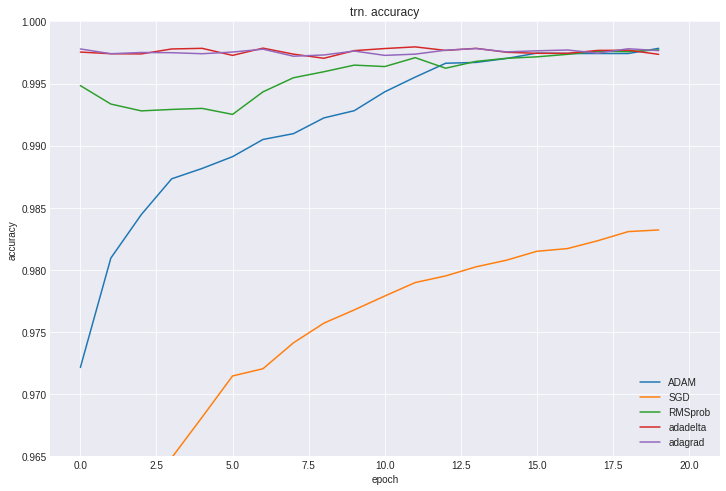

In [ ]:
plot_history(hists, attribute='accuracy', axis=(-1,21,0.965,1.0), loc='lower right')

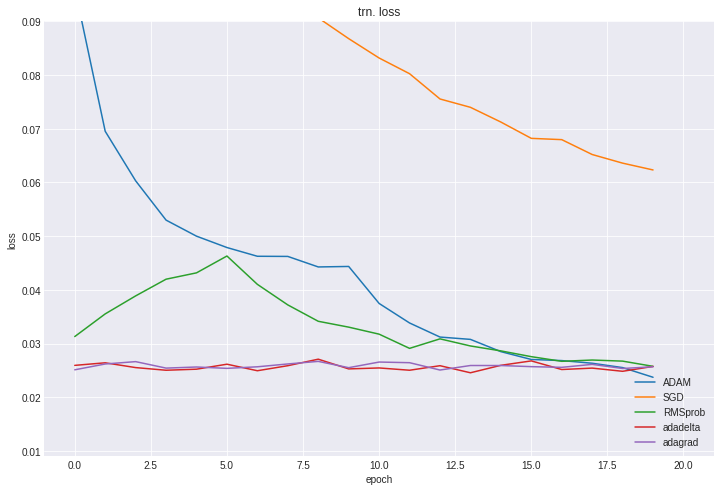

In [ ]:
plot_history(hists, attribute='loss', axis=(-1,21,0.009, 0.09), loc='lower right')

**As you can see in the plots above, ADAM optimization is better than other optimizations with a little difference.**

# References

[Source 1](https://d2l.ai/chapter_optimization/optimization-intro.html#optimization-and-estimation)

[Source 2](https://www.kdnuggets.com/2020/12/optimization-algorithms-neural-networks.html)

[Source 3](https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/)

[Source 4](https://datascience-enthusiast.com/DL/Optimization_methods.html)

[Source 5](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/)

[Source 6](https://ruder.io/optimizing-gradient-descent/index.html#adagrad)

[Source 7](https://github.com/ayyucekizrak/Keras_ile_Derin_Ogrenmeye_Giris/blob/master/B%C3%B6l%C3%BCm4/Optimizasyon_Y%C3%B6ntemlerinin_Kar%C5%9F%C4%B1la%C5%9Ft%C4%B1rmas%C4%B1.ipynb)